In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/econometria/ObesityDataSet_raw_and_data_sinthetic.csv"

datos = pd.read_csv(file_path)

datos

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Análisis descriptivo

In [ ]:
pesos = datos['Weight']

## Media

In [ ]:
pesos.mean()

86.58605812648035

## Mínimo

In [ ]:
pesos.min()

39.0

## Máximo

In [ ]:
pesos.max()

173.0

## Varianza

In [ ]:
pesos.var()

685.9774773868083

## Desviación típica

In [ ]:
pesos.std()

26.191171745204688

In [ ]:
pesos.describe()

,Weight
count,2111.000000
mean,86.586058
std,26.191172
min,39.000000
25%,65.473343
50%,83.000000
75%,107.430682
max,173.000000


# Gráficos

## Puntos(Peso-Edad)

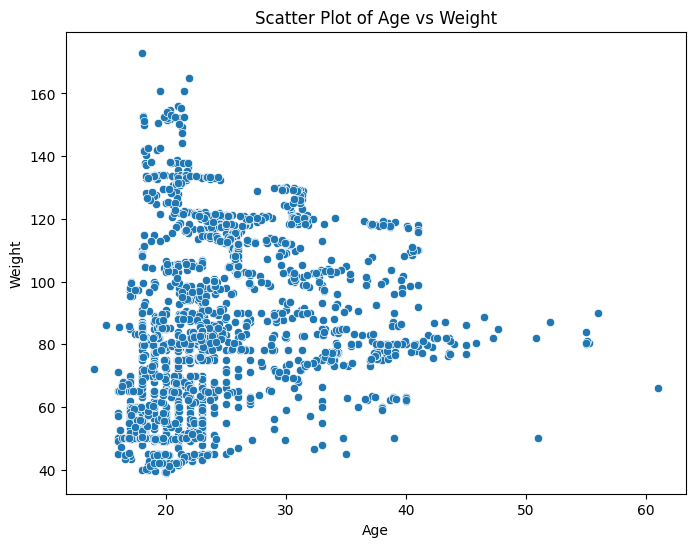

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='Age', y='Weight', data=datos)
plt.title('Scatter Plot of Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

## Barras(pesos)

<Axes: xlabel='Weight', ylabel='Count'>

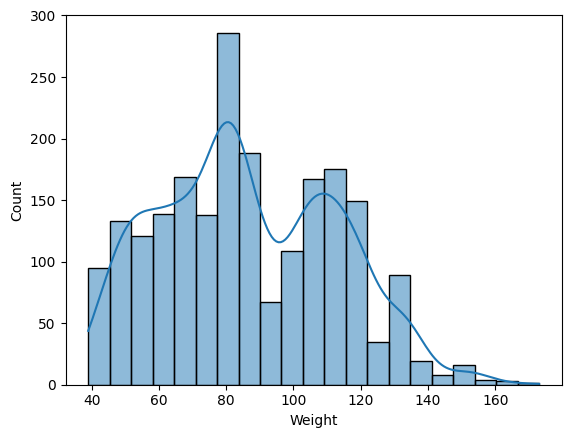

In [ ]:
import seaborn as sns

sns.histplot(pesos, kde=True)

## Barras(género)

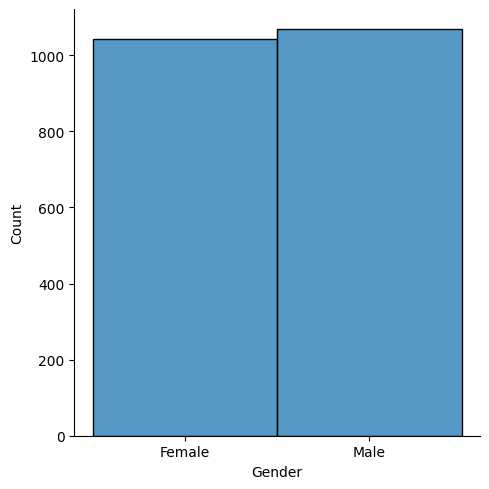

In [ ]:
sns.displot(datos["Gender"])

Transformamos las variables categóricas

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Crear una copia de los datos para evitar modificar el original
data_cleaned = datos.copy()

# Convertir las columnas categóricas manualmente usando LabelEncoder
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
              'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

le = LabelEncoder()
for col in label_cols:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])


# Revisa el dataset después de la conversión
data_cleaned


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Separa las variables independientes (X) y la dependiente (y)
X = data_cleaned.drop('Weight', axis=1)  # Mantén X como un DataFrame de pandas
y = data_cleaned['Weight']

# Añade una constante para la intersección
X = sm.add_constant(X)

# Verifica si hay valores faltantes o no numéricos y elimínalos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X = X.dropna()
y = y.dropna()

# Crea y ajusta el modelo (manteniendo X como DataFrame de pandas)
model = sm.OLS(y, X)
results = model.fit()

# Imprime el resumen del modelo con nombres de las columnas
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     177.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:42:03   Log-Likelihood:                -8983.6
No. Observations:                2111   AIC:                         1.800e+04
Df Residuals:                    2094   BIC:                         1.810e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Recta de regresión

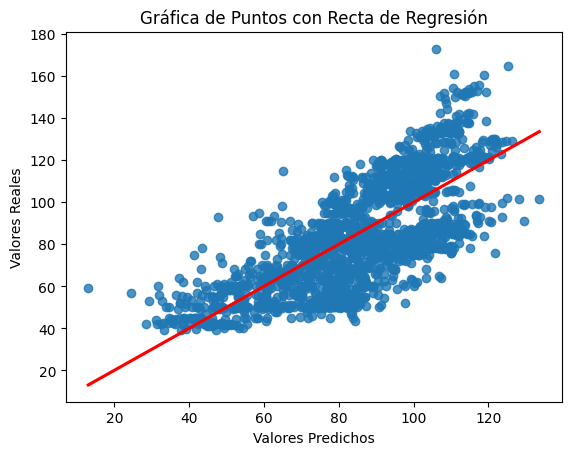

In [ ]:
import seaborn as sns

# Pinta la gráfica de puntos con la recta de regresión
sns.regplot(x=results.fittedvalues, y=y, data=data_cleaned, ci=None, line_kws={"color": "red"})
plt.title('Gráfica de Puntos con Recta de Regresión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.show()

# Interpretación de los resultados de la regresión OLS

## 1. Medidas de ajuste del modelo
- **R-squared (R²):** 0.576
  - Esto indica que el modelo explica aproximadamente el 57.6% de la variabilidad en la variable dependiente (y). Aunque es razonable, no es un ajuste extremadamente alto, lo que sugiere que otras variables fuera del modelo podrían influir en el resultado.
  
- **Adjusted R-squared (R² ajustado):** 0.572
  - El R² ajustado es ligeramente inferior al R² simple, ya que penaliza por la inclusión de variables adicionales que no mejoran mucho el ajuste. Esto significa que algunas variables pueden no estar aportando demasiado al modelo.
  
- **F-statistic:** 177.5
  - Este valor evalúa la significancia global del modelo. Un valor F alto con una **probabilidad asociada (Prob F-statistic) de 0.000** indica que el modelo es estadísticamente significativo, es decir, las variables independientes, en conjunto, predicen bien la variable dependiente.

## 2. Coeficientes
Los coeficientes (`coef`) representan el efecto de cada variable independiente en la variable dependiente (y), manteniendo constantes las demás.

- **const (Intersección):** -207.9919
  - Este es el valor de la variable dependiente (y) cuando todas las variables independientes son 0. No tiene una interpretación directa si los valores de las variables \( X \) no pueden ser 0.

- **x1 a x16:**
  - **Significancia de los coeficientes (P>|t|):** Los valores **p** indican si cada variable es estadísticamente significativa para predecir \( y \). Valores de **p** menores a 0.05 sugieren que el coeficiente de esa variable es significativo. La mayoría de las variables aquí son significativas excepto **x9** (con un p-valor de 0.938).
  
  - **Interpretación de los coeficientes:**
    - **x1:** -4.7575 (p-valor = 0.000) → Un aumento en la variable \( x1 \) reduce \( y \) en 4.76 unidades, manteniendo las demás variables constantes.
    - **x3:** 125.2342 (p-valor = 0.000) → \( y \) aumenta en 125.23 unidades por cada incremento unitario en \( x3 \), manteniendo las demás constantes.
    - **x9:** -0.2063 (p-valor = 0.938) → Este coeficiente no es estadísticamente significativo, por lo que \( x9 \) no parece afectar a \( y \) de manera significativa.

## 3. Signos de los coeficientes
- Los coeficientes positivos (como en \( x3 \), \( x4 \), etc.) indican que, a medida que esa variable aumenta, también lo hace la variable dependiente (y).
- Los coeficientes negativos (como \( x1 \), \( x11 \), etc.) indican que, a medida que esa variable aumenta, la variable dependiente (y) disminuye.

## 4. Estadísticas de diagnóstico del modelo
- **Durbin-Watson:** 0.741
  - Esto indica la posible presencia de autocorrelación de los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación. En este caso, 0.741 indica que puede haber correlación positiva entre los errores, lo que podría ser un problema.

- **Omnibus y Jarque-Bera:** Estas pruebas evalúan la normalidad de los residuos. Como el valor p de la prueba Jarque-Bera es muy bajo (**1.94e-05**), esto sugiere que los residuos no siguen una distribución normal.

- **Cond. No. (Número de condición):** 812
  - Un número de condición alto indica la presencia de **multicolinealidad**, es decir, algunas variables independientes están altamente correlacionadas entre sí, lo que puede afectar la estabilidad de los coeficientes.

## Conclusión
El modelo tiene un ajuste moderado (R² = 0.576), con muchas variables que son estadísticamente significativas (excepto \( x9 \)). Sin embargo, los diagnósticos sugieren la posibilidad de autocorrelación de los errores y problemas de multicolinealidad, lo que podría afectar la confiabilidad de las estimaciones. Podrías considerar revisar la multicolinealidad y la autocorrelación para mejorar el modelo.


# Análisis de la multicolienalidad
Se tiene que Cond. No. $ \sqrt{812} = 28,49 $ que como es menor que 30, tenemos unos niveles de multicolienalidad aceptables.

Para calcular el $\text{FIV} = \frac{1}{1-R_i^2}$ para cada una de las variables.

## FIV

In [ ]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs

[760.636835910891,
 1.8917946883310923,
 1.9300022267357846,
 2.175272452748579,
 1.333384576527447,
 1.1562687902085031,
 1.1521736578971364,
 1.114474771202323,
 1.1925812014559585,
 1.0419533212282672,
 1.1224948335440916,
 1.1020111569322246,
 1.2213541982496148,
 1.1333101538612995,
 1.114839670385367,
 1.6705440072577307,
 1.3290739583345859]

## Matriz de correlación

In [ ]:
# Eliminar la columna 'const' de X
X_no_const = X.loc[:, X.var() > 0]  # Selecciona solo las columnas con varianza distinta de cero

# Calcular la matriz de correlación sin la columna constante
corr_matrix = np.corrcoef(X_no_const.T)
print(corr_matrix)


[[ 1.          0.0483942   0.6184663   0.10251213  0.06493377 -0.27450478
   0.06759999  0.09154334  0.04469809  0.10792968 -0.10263348  0.18960696
   0.01726947  0.00761587 -0.1375373   0.02490758]
 [ 0.0483942   1.         -0.02595813  0.20572533  0.06390169  0.01629089
  -0.04394373  0.0837387   0.09198745 -0.04530386 -0.11628285 -0.14493833
  -0.29693059 -0.04448711 -0.60194519  0.23617035]
 [ 0.6184663  -0.02595813  1.          0.24768389  0.17836378 -0.03812106
   0.24367173  0.0488182   0.05549938  0.21337592 -0.13375278  0.294709
   0.05191167 -0.12973186 -0.07360921  0.03898583]
 [ 0.10251213  0.20572533  0.24768389  1.          0.20803551  0.04037225
   0.0713697   0.16978653  0.0173855   0.14743661 -0.18542171 -0.0566732
   0.0229433   0.03667591 -0.10153969  0.31366704]
 [ 0.06493377  0.06390169  0.17836378  0.20803551  1.         -0.02728308
  -0.00699994  0.15006763 -0.05065996  0.00971913 -0.19065831 -0.10799516
   0.06841691 -0.08951952 -0.06980021  0.04458231]
 [-0.274

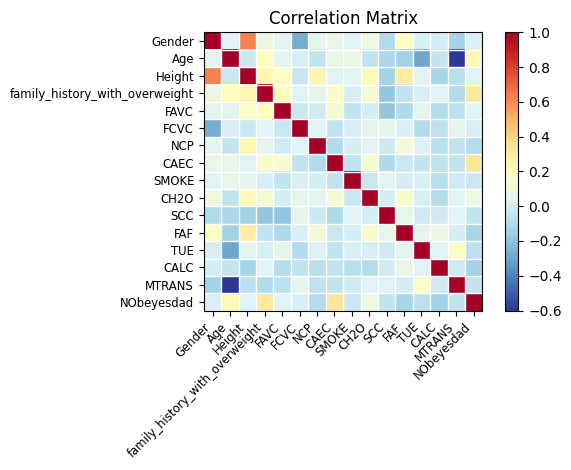

<Figure size 640x480 with 0 Axes>

In [ ]:
import statsmodels.graphics.api as smg
import matplotlib.pylab as plt
smg.plot_corr(corr_matrix, xnames=[
    'Gender', 'Age', 'Height', 'family_history_with_overweight', 'FAVC',
    'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
    'CALC', 'MTRANS', 'NObeyesdad'
])
plt.show()
plt.savefig("correlation_plot.pdf", format="pdf", bbox_inches="tight")

Vemos que hay multicolienalidad en la variable Height, vamos a eliminarla del modelo

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Separa las variables independientes (X) y la dependiente (y)
X = data_cleaned.drop(['Weight', 'Height'], axis=1)  # Excluye 'Height' de las variables independientes
y = data_cleaned['Weight']

# Añade una constante para la intersección
X = sm.add_constant(X)

# Verifica si hay valores faltantes o no numéricos y elimínalos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X = X.dropna()
y = y.dropna()

# Crea y ajusta el modelo sin la variable 'Height'
model = sm.OLS(y, X)
results = model.fit()

# Imprime el resumen del modelo sin 'Height'
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     131.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.83e-287
Time:                        20:40:05   Log-Likelihood:                -9189.7
No. Observations:                2111   AIC:                         1.841e+04
Df Residuals:                    2095   BIC:                         1.850e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Ahora volvemos a calcular la matriz de correlacion para ver si hemos solucionado el problema

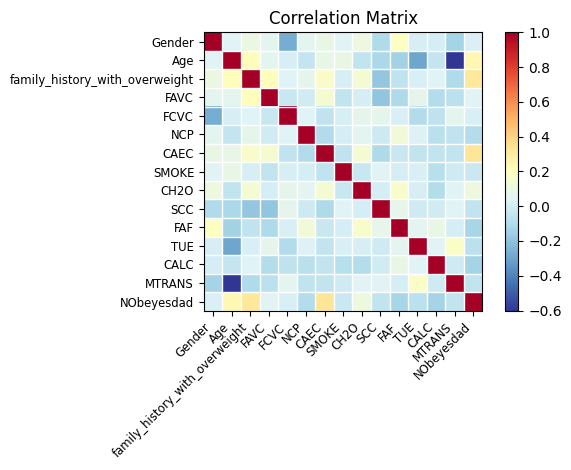

In [ ]:
# Eliminar la columna 'const' de X
X_no_const = X.loc[:, X.var() > 0]  # Selecciona solo las columnas con varianza distinta de cero

# Calcular la matriz de correlación sin la columna constante
corr_matrix = np.corrcoef(X_no_const.T)
smg.plot_corr(corr_matrix, xnames=[
    'Gender', 'Age', 'family_history_with_overweight', 'FAVC',
    'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
    'CALC', 'MTRANS', 'NObeyesdad'
])
plt.show()


Ahora vamos a caluclar el fiv y el nc de nuevo para ver la mejora

In [ ]:

import numpy as np

CN = np.sqrt(results.condition_number) #Número de Condición
print(CN)
# Calcular el número de condición de la matriz de correlación
cond_number = np.linalg.cond(corr_matrix)

# Mostrar el número de condición
print(f'Número de condición de la matriz de correlación: {cond_number}')



18.040573140291805
Número de condición de la matriz de correlación: 6.538003706788024


In [ ]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs

[153.31143340379646,
 1.1928526714295005,
 1.9121802118909088,
 1.2756912396601292,
 1.1256804743076716,
 1.1317602711598735,
 1.0692339715860273,
 1.1887541901686012,
 1.0400666904755955,
 1.1104012517224668,
 1.0951001689663638,
 1.1526731059131152,
 1.1332528042873717,
 1.080952625677195,
 1.6686474890612188,
 1.3288526444527797]

Vamos ha hacer otra prueba ahora sin el gender

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Separa las variables independientes (X) y la dependiente (y)
X = data_cleaned.drop(['Weight', 'Gender'], axis=1)  # Excluye 'Height' de las variables independientes
y = data_cleaned['Weight']

# Añade una constante para la intersección
X = sm.add_constant(X)

# Verifica si hay valores faltantes o no numéricos y elimínalos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X = X.dropna()
y = y.dropna()

# Crea y ajusta el modelo sin la variable 'Height'
model = sm.OLS(y, X)
results = model.fit()

# Imprime el resumen del modelo sin 'Height'
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     186.1
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -8994.4
No. Observations:                2111   AIC:                         1.802e+04
Df Residuals:                    2095   BIC:                         1.811e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

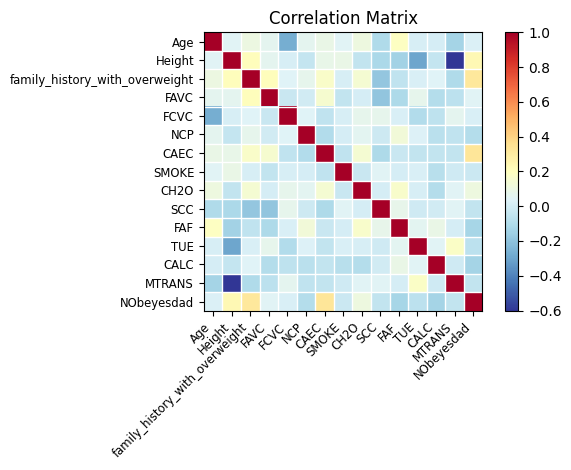

In [ ]:
import statsmodels.graphics.api as smg
import matplotlib.pylab as plt
smg.plot_corr(corr_matrix, xnames=[
     'Age',  'family_history_with_overweight', 'FAVC',
    'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
    'CALC', 'MTRANS', 'NObeyesdad'
])
plt.show()

# Heteroscedasticidad
## Tests

## Golfeld-Quandt (muestras pequeñas)

In [ ]:
import statsmodels.stats.api as sms

#GOLDFELD-QUANDT (Muestras Pequeñas)
#GQ=sms.het_goldfeldquandt(results.resid, results.model.exog)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Age"])) # Con cada variable
print("Goldfeld Quandt: ", GQ)

Goldfeld Quandt:  (1.2406045928561897, 0.0002372280611791577, 'increasing')


Esto me dice si las varianzas de los datos pequeños es distinto de los datos grandes.

## Breush-Pagan

In [ ]:
#BREUSH-PAGAN
BP=sms.het_breuschpagan(results.resid, results.model.exog)
print("Breush Pagan: ", BP)

Breush Pagan:  (410.8601412520246, 1.9233202370401664e-77, 31.627586818626348, 1.1576933254752088e-86)


Tiene que ser menor a 0.05

## White

In [ ]:
#WHITE
W=sms.het_white(results.resid, results.model.exog)
print("White: ", W)

White:  (938.4452884574112, 1.4045865772503514e-122, 12.189830873984205, 1.6305790638721566e-172)


## Glejser

In [ ]:
#GLEJSER
import numpy as np
z=np.array(datos["Age"].values, dtype=float)
for h in [-2, -1, -0.5, 0.5, 1, 2]:
    # |e| = delta_0 + delta_1 z^h + eps
    mcoaux=sm.OLS(abs(results.resid), sm.add_constant(z**h)).fit()
    pval=mcoaux.pvalues["x1"]
    print("h: ", h, "-> pvalt:", pval, "R2: ", mcoaux.rsquared)

h:  -2 -> pvalt: 2.868805557108985e-05 R2:  0.008266720251093207
h:  -1 -> pvalt: 6.21278662681184e-05 R2:  0.0075768670526320525
h:  -0.5 -> pvalt: 0.0001190468484429662 R2:  0.00699826778858581
h:  0.5 -> pvalt: 0.0006963835032709221 R2:  0.005438735924912841
h:  1 -> pvalt: 0.0019964743916714616 R2:  0.004520353774315478
h:  2 -> pvalt: 0.018146243773716614 R2:  0.0026438665705762476


1. Goldfeld-Quandt
Resultado:

Estadístico GQ:
1.2406
1.2406
p-valor:
0.000237
0.000237 (menor a 0.05)
Interpretación:

Dado que el p-valor es menor a 0.05, rechazamos la hipótesis nula de homoscedasticidad. Esto indica que hay evidencia de heteroscedasticidad en los datos, con una varianza creciente (según el resultado "increasing").
2. Breusch-Pagan
Resultado:

Estadístico LM:
310.298
310.298
p-valor:
4.03
×
1
0
−
57
4.03×10
−57
  (muy pequeño, menor a 0.05)
Interpretación:

El p-valor extremadamente bajo sugiere que rechazamos la hipótesis nula de homoscedasticidad. Existe una fuerte evidencia de heteroscedasticidad.
3. White
Resultado:

Estadístico LM:
938.445
938.445
p-valor:
1.40
×
1
0
−
122
1.40×10
−122
  (muy pequeño, menor a 0.05)
Interpretación:

El test de White también indica que rechazamos la hipótesis nula de homoscedasticidad. Esto confirma la presencia de heteroscedasticidad.
4. Glejser
Resultados para diferentes valores de
h
h:

Para
h
=
−
2
,
−
1
,
−
0.5
,
0.5
,
1
,
2
h=−2,−1,−0.5,0.5,1,2, todos los p-valores son extremadamente pequeños (menores a 0.05), lo que indica que para cada transformación del predictor, existe evidencia de heteroscedasticidad.
Los valores de
R
2
R
2
  son bajos, pero consistentes, indicando que la relación entre los errores absolutos y las transformaciones del predictor existe pero no es fuerte.
Interpretación:

Los resultados de Glejser también confirman la presencia de heteroscedasticidad.

## Gráficos





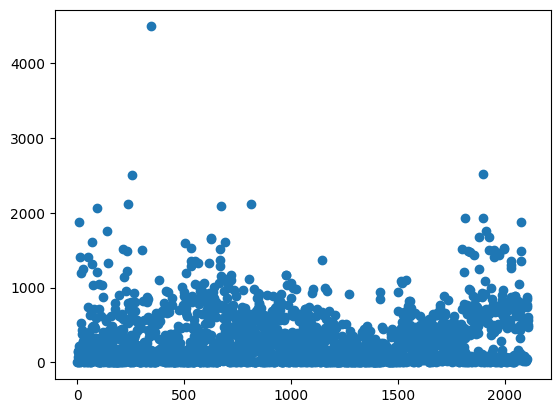

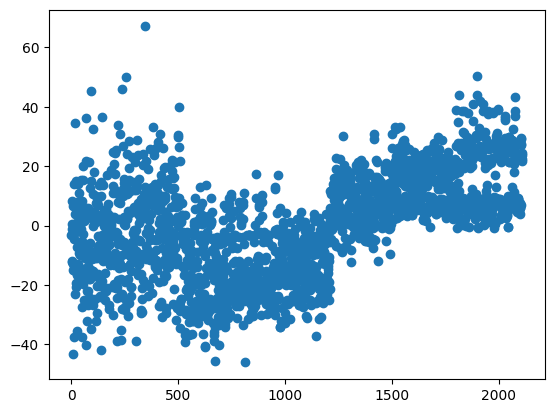

In [ ]:
import matplotlib.pylab as plt

plt.scatter(list(range(int(results.nobs))), results.resid**2)
plt.show()
plt.scatter(list(range(int(results.nobs))), results.resid)
plt.show()

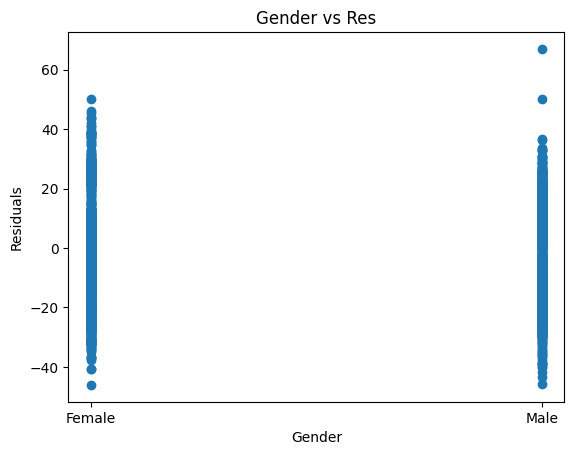

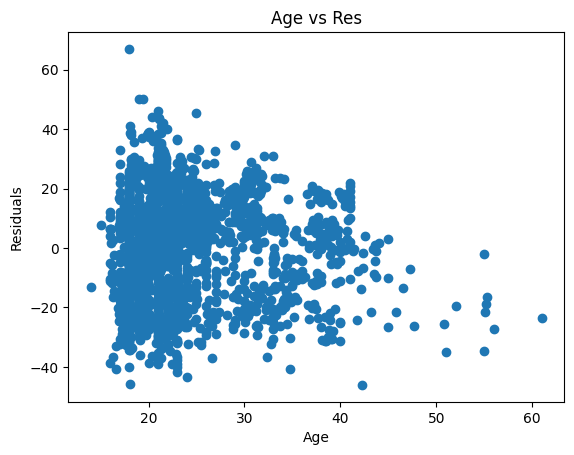

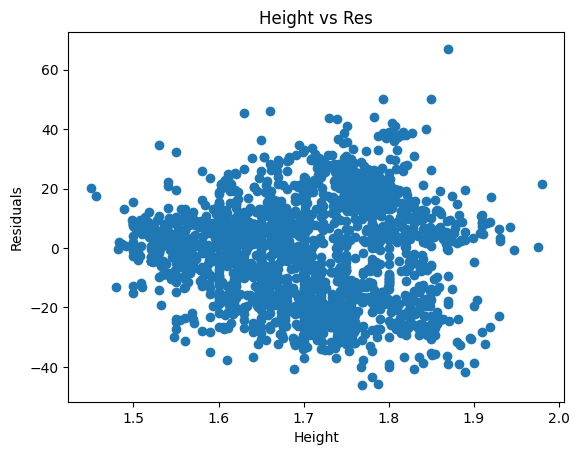

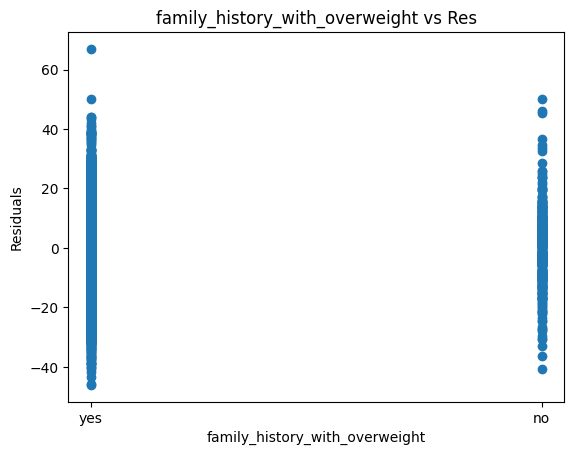

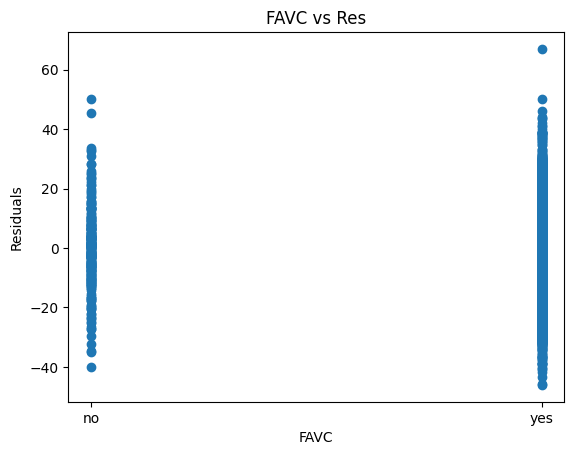

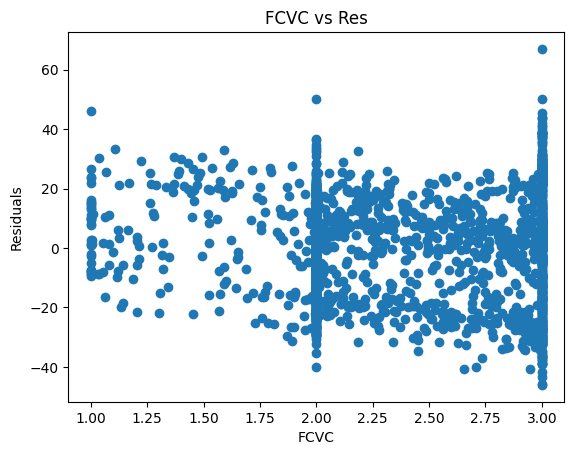

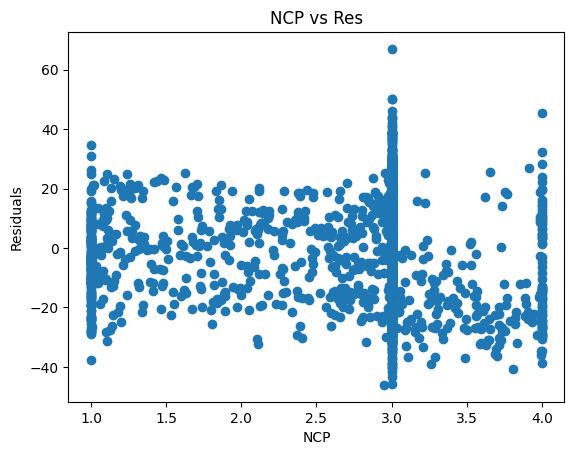

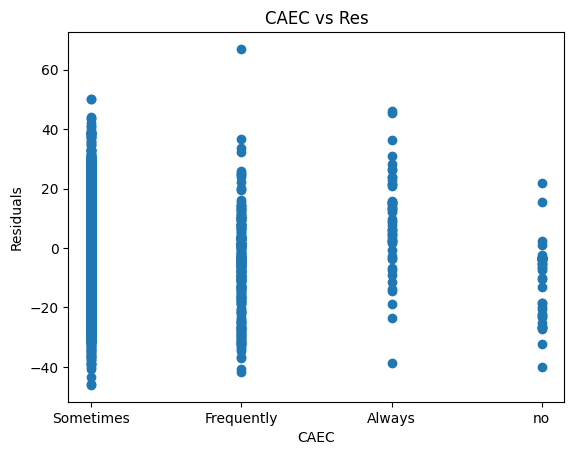

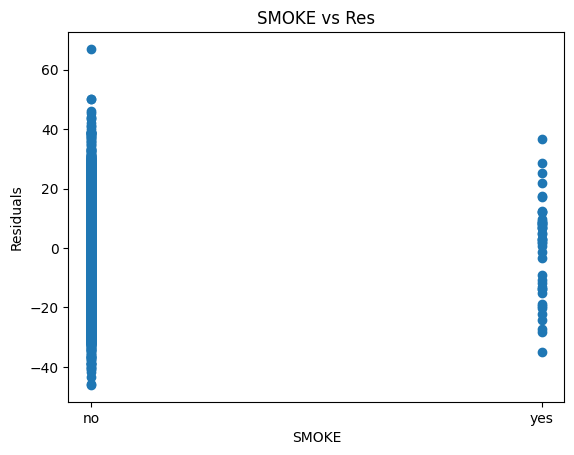

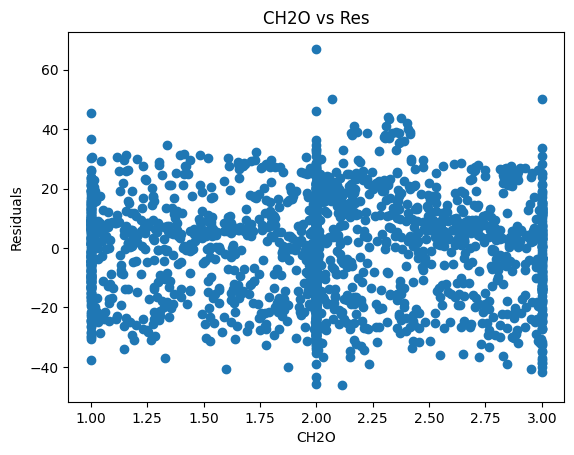

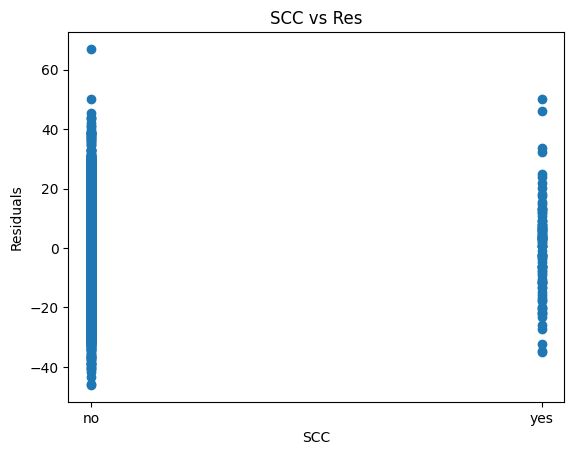

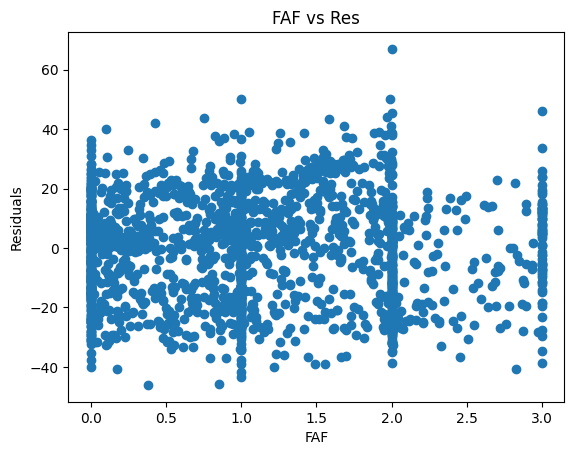

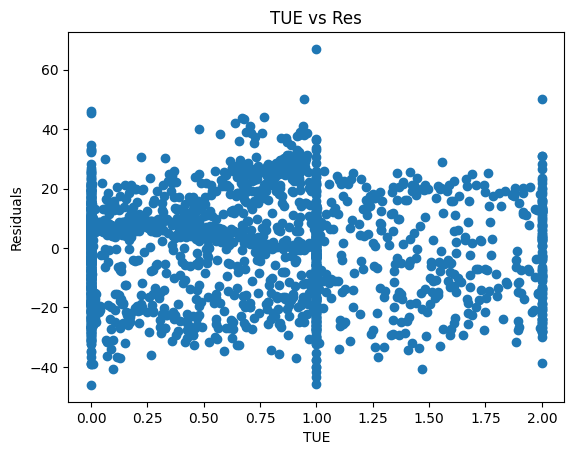

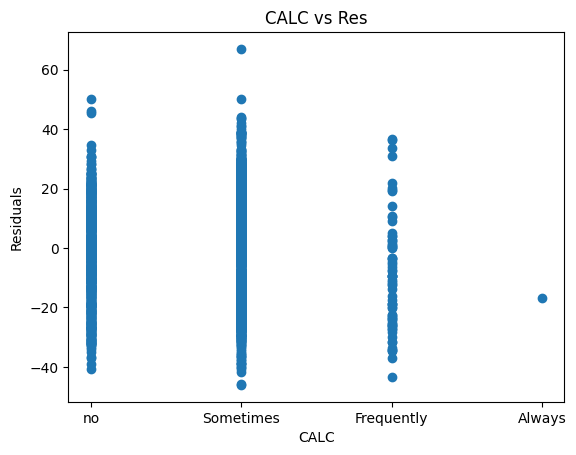

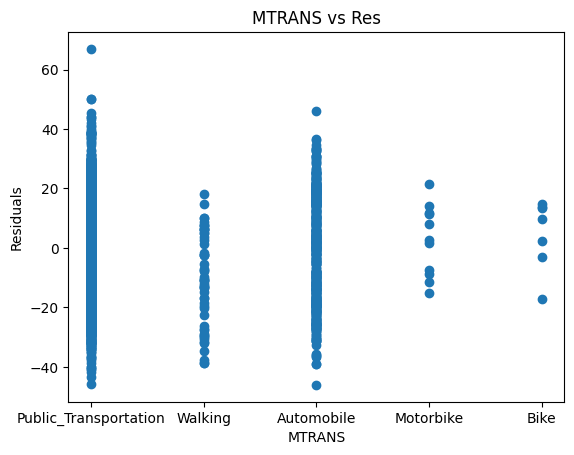

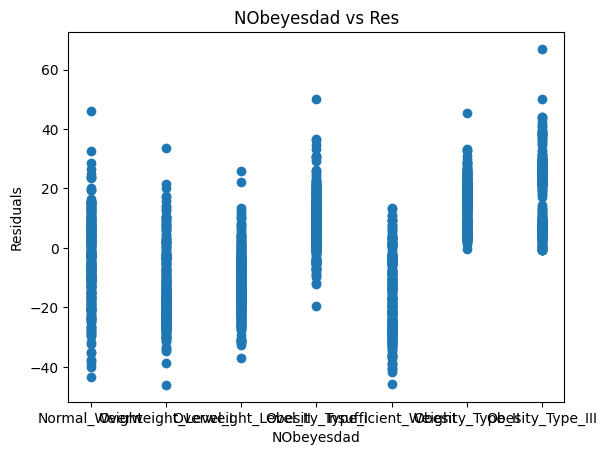

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

variables = ['Gender', 'Age', 'Height', 'family_history_with_overweight', 'FAVC',
             'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
             'CALC', 'MTRANS', 'NObeyesdad']

for variable in variables:
    plt.scatter(datos[variable], results.resid)
    plt.title(f'{variable} vs Res')
    plt.xlabel(variable)  # Add x-axis label
    plt.ylabel('Residuals')  # Add y-axis label
    plt.show()



Tan solo se observa algo de heterocedasticidad en la variable Age.

# Mínimos Cuadrados Ponderados

In [ ]:
mcp = sm.WLS(y, sm.add_constant(X), weights=1./np.sqrt(z)).fit()
mcp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.584
Model:                            WLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     183.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:43:40   Log-Likelihood:                -9001.8
No. Observations:                2111   AIC:                         1.804e+04
Df Residuals:                    2094   BIC:                         1.813e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -216.3333     10.357    -20.888      0.000    -236.644    -196.022
Gender                            -5.9958      1.021     -5.872      0.000      -7.998      -3.993
Age                                0.8450      0.086      9.789      0.000       0.676       1.014
Height                           128.8866      5.913     21.797      0.000     117.290     140.483
family_history_with_overweight    16.3267      1.111     14.690      0.000      14.147      18.506
FAVC                               7.6898      1.245      6.175      0.000       5.248      10.132
FCVC                               8.8173      0.748     11.795      0.000       7.351      10.283
NCP                                0.9702      0.508      1.912      0.056      -0.025       1.966
CAEC                               7.7443      0.860      9.000      0.000       6.057       9.432
SMOKE                             -0.0856      2.764     -0.031      0.975      -5.506       5.335
CH2O                               1.4428      0.650      2.220      0.027       0.168       2.717
SCC                               -6.7508      1.827     -3.695      0.000     -10.333      -3.168
FAF                               -2.6776      0.487     -5.497      0.000      -3.633      -1.722
TUE                               -1.5889      0.651     -2.441      0.015      -2.866      -0.312
CALC                              -3.7291      0.774     -4.820      0.000      -5.246      -2.212
MTRANS                             3.9056      0.392      9.953      0.000       3.136       4.675
NObeyesdad                         2.6400      0.222     11.917      0.000       2.206       3.074
==============================================================================
Omnibus:                       27.439   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.804
Skew:                          -0.003   Prob(JB):                     0.000224
Kurtosis:                       2.563   Cond. No.                         789.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Autocorrelación (no tiene mucho sentido con nuestros datos)

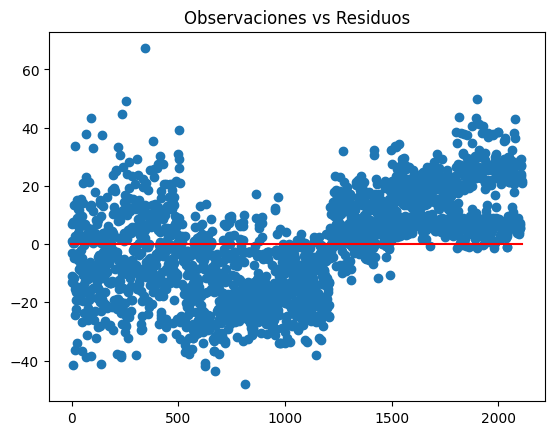

In [ ]:
import matplotlib.pylab as plt

plt.scatter(list(range(int(mcp.nobs))), mcp.resid)
plt.plot([-1,mcp.nobs+1], [0,0], color='r')
plt.title("Observaciones vs Residuos")
plt.show()

## Durbin-Watson

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(mcp.resid)
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 0.742061423790473


## H_Durbin

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Simulated example: Autoregressive data
np.random.seed(0)
n = 100
y_original = datos["Weight"]
y_retardada = np.roll(y_original, 1)  #
y_retardada[0] = 0  #


modelo = sm.OLS(y_original, sm.add_constant(y_retardada)).fit()

# Extract parameters
beta = modelo.params["x1"]  # Coeficiente
var_beta = modelo.bse["x1"] ** 2  # Variance del coeficiente

# Compute Durbin's h statistic
h = (1 - dw / 2) * np.sqrt(n / (1 - var_beta))


print("h-Durbin:", h)

# Check significance of h
if np.abs(h) > 1.96:  # Rough 95% confidence interval
    print("Autocorrelation detectada.")
else:
    print("Autocorrelation no significativa.")


h-Durbin: 6.290100504904384
Autocorrelation detectada.


## Ljung-Box

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox


acorr_ljungbox(mcp.resid, lags=5)

,lb_stat,lb_pvalue
1,835.261989,1.163252e-183
2,1517.328358,0.000000e+00
3,2100.514608,0.000000e+00
4,2619.340850,0.000000e+00
5,3114.665763,0.000000e+00


from matplotlib import pyplot as plt
_df_0['lb_stat'].plot(kind='hist', bins=20, title='lb_stat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['lb_pvalue'].plot(kind='hist', bins=20, title='lb_pvalue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='lb_stat', y='lb_pvalue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lb_stat']
  ys = series['lb_pvalue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('lb_stat', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lb_stat')
_ = plt.ylabel('lb_pvalue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['lb_stat']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'lb_stat'}, axis=1)
              .sort_values('lb_stat', ascending=True))
  xs = counted['lb_stat']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('lb_stat', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lb_stat')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['lb_stat'].plot(kind='line', figsize=(8, 4), title='lb_stat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['lb_pvalue'].plot(kind='line', figsize=(8, 4), title='lb_pvalue')
plt.gca().spines[['top', 'right']].set_visible(False)

## Corrección: Cochran-Orcutt

In [ ]:
rho= 1 - dw/2 # dw = 2(1-rho) => rho = 1 - DW/2
print(rho)
mco_autocorr=sm.GLSAR(y, sm.add_constant(X), rho=rho)
res=mco_autocorr.iterative_fit(maxiter=100,rtol=10**(-10))


print ('Iteraciones = %d -->  Converge: %s' % (res.iter, res.converged) )
print ('Rho =  ', mco_autocorr.rho)
print(res.summary())

0.6289692881047635
Iteraciones = 9 -->  Converge: True
Rho =   [0.90838142]
                           GLSAR Regression Results                           
Dep. Variable:                 Weight   R-squared:                       0.591
Model:                          GLSAR   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     189.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:52:28   Log-Likelihood:                -7579.7
No. Observations:                2110   AIC:                         1.519e+04
Df Residuals:                    2093   BIC:                         1.529e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------